In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

#### Baseline Comparison

In [2]:
vertex_count = 10000
graph_seeds = [42, 3345638259, 379427824]

In [8]:
# First set of experiments on the effect of epsilon

eps_arr = [0.25, 0.5, 1.0, 2.0, 4.0]
delt = 1e-6
target = 55
eps_dfs = []
baseline_dfs = []
for graph_seed in graph_seeds:
    tempdf = pd.read_json(f'runs/dp_size_10000_graph_{graph_seed}_noeps_target_{target}.json')
    baseline_dfs.append(tempdf)
    for eps in eps_arr:
        tempdf = pd.read_json(f'runs/dp_size_10000_graph_{graph_seed}_eps_{eps}_delt_{delt}_target_{target}.json')
        tempdf['eps'] = eps
        eps_dfs.append(tempdf)

In [9]:
df_eps = pd.concat(eps_dfs)
df_base = pd.concat(baseline_dfs)

In [18]:
df_base

,lp_type,graph_seed,num_vertices,num_edges,realSol,budget,residue,total_time
0,dp,42,10000,84025,"[4809, 1420, 8777, 4697, 8555, 6737, 8244, 696...",99,0,4.884584
0,dp,3345638259,10000,83842,"[5500, 744, 192, 8716, 8851, 8380, 6676, 910, ...",95,0,4.414462
0,dp,379427824,10000,84549,"[4538, 3425, 5103, 2303, 8976, 671, 192, 2727,...",88,0,4.297985


Graph the budgets vs epsilon

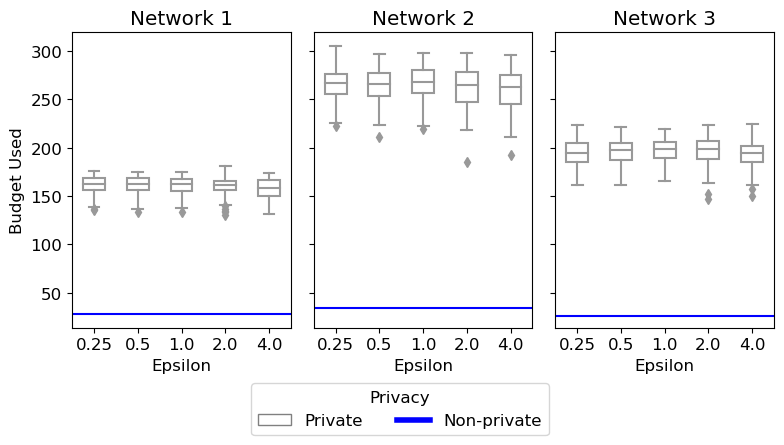

In [10]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


fig, axs = plt.subplots(ncols = 3, nrows=1, figsize=(8, 4), sharex=True, sharey='row')

plt.rcParams.update({'font.size': 12})
graph_dict = {g:i+1 for i,g in enumerate(graph_seeds)}

for i, graph_seed in enumerate(graph_seeds):
    
    # First row of plots (avg)
    plot = sns.boxplot(df_eps[(df_eps['graph_seed']==graph_seed) & (df_eps['rand_seed']<143)],\
                 x='eps', y='budget', ax = axs[i], width=0.5, color="white",labels=['Private'])
    p = plot.axhline(y = df_base[(df_base["graph_seed"]==graph_seed)].iloc[0]["budget"], color = 'b', linestyle = '-',label='Non-private') 
    
    handles, labels = axs[i].get_legend_handles_labels()
    axs[i].set_title(f"Network {graph_dict[graph_seed]}")
    axs[i].set_ylabel("")
    axs[i].set_xlabel("Epsilon")
    plot.legend().remove()
    
    
    if i == 0:
        axs[i].set_ylabel("Budget Used")
custom_lines = [Patch(facecolor='white',edgecolor='gray'),
                Line2D([0], [0], color='b', lw=4)]
fig.legend(custom_lines, ['Private','Non-private'], loc='upper center', title="Privacy", ncol = 4, bbox_to_anchor=(0.51, 0.04))

plt.tight_layout()
plt.savefig(f"figures/dp_size_10000_target_{target}_delt_1e-6_eps_budget.png", dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


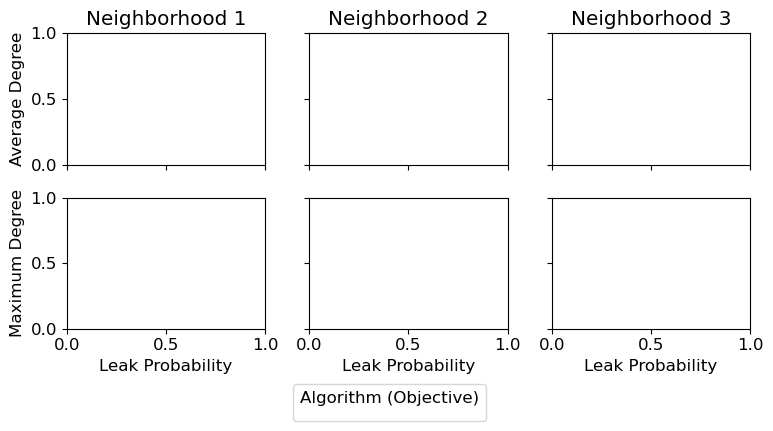

In [8]:
fig, axs = plt.subplots(ncols = 3, nrows=2, figsize=(8, 4), sharex=True, sharey='row')

plt.rcParams.update({'font.size': 12})
hue_order = ['avg_degree', 'max_degree']
graph_seeds = [42, 3345638259, 379427824]
graph_dict = {g:i+1 for i,g in enumerate(graph_seeds)}

for i, graph_seed in enumerate(graph_seeds):
    
    # First row of plots (avg)
    plot = sns.lineplot(df_baseline[(df_baseline['graph_seed']==graph_seed)&(df_baseline['lp_type']=='avg_degree')&(df_baseline['budget']==200)],\
                 x='leak_probability', y='evaluated_avg_degree', label='Baseline (Avg)', linestyle = 'dashed', color=sns.color_palette()[0], hue_order = hue_order, legend=True, ax = axs[0][i])
    
    plot = sns.lineplot(df_leak[(df_leak['graph_seed']==graph_seed)&(df_leak['budget']==200)&(df_leak['lp_type']=='avg_degree')], \
                 x='leak_probability', y='evaluated_avg_degree', label='Leaky (Avg)', color=sns.color_palette()[0], ax = axs[0][i], hue_order = hue_order, legend = True)

    handles, labels = axs[0][i].get_legend_handles_labels()
    axs[0][i].set_title(f"Neighborhood {graph_dict[graph_seed]}")
    axs[0][i].set_ylabel("")
    plot.legend().remove()
    
    # Second row of plots (max)
    plot1 = sns.lineplot(df_baseline[(df_baseline['graph_seed']==graph_seed)&(df_baseline['lp_type']=='max_degree')&(df_baseline['budget']==200)],\
                 x='leak_probability', y='evaluated_max_degree', label='Baseline (Max)', linestyle = 'dashed', color=sns.color_palette()[1], hue_order = hue_order, ax = axs[1][i], legend = False)
    plot1 = sns.lineplot(df_leak[(df_leak['graph_seed']==graph_seed)&(df_leak['budget']==200)&(df_leak['lp_type']=='max_degree')],\
                 x='leak_probability', y='evaluated_max_degree', label='Leaky (Max)', color=sns.color_palette()[1], hue_order = hue_order, ax=axs[1][i], legend=True)

    handles1, labels1 = axs[1][i].get_legend_handles_labels()
    plot1.legend().remove()
    
    axs[1][i].set_xlabel("Leak Probability")
    axs[1][i].set_ylabel("")
    
    if i == 0:
        axs[0][i].set_ylabel("Average Degree")
        axs[1][i].set_ylabel("Maximum Degree")

fig.legend(handles+handles1, labels+labels1, loc='upper center', title="Algorithm (Objective)", ncol = 4, bbox_to_anchor=(0.51, 0.04))

plt.tight_layout()
plt.savefig("figures/baseline_greedy_leak_maxavg_comparison.png", dpi=300, bbox_inches='tight')

In [10]:
df_leak.head()

,lp_type,trial,graph_seed,num_vertices,num_edges,sample_size,budget,leak_probability,lp_objective,lp_solution,...,transmission_probability,initial_infection_size,infection_trials,original_avg_degree,original_max_degree,original_infection_spread,evaluated_avg_degree,evaluated_max_degree,evaluated_infection_spread,vaccinated_vertices


### Infection Spread Criteria

In [10]:
dfs = []
infection_dfs = []

# Load leak and infection for leak runs
for graph_seed in graph_seeds:
    file_path = f'evaluation/evaluated_greedy_leak_{graph_seed}.json'
    dfs.append(pd.read_json(file_path))
    infection_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_infection_{graph_seed}.json'))

df_leak_main = pd.concat(dfs)
df_leak_main['exp_budget'] = df_leak_main['vaccinated_vertices'].apply(lambda x: len(x))

df_leak_infection = pd.concat(infection_dfs)
df_leak_infection = df_leak_infection[df_leak_infection['transmission_probability']==0.1]

In [11]:
# Connect infection and other metrics
df_leak_infection_supplemented = df_leak_infection.merge(df_leak_main[['trial', 'graph_seed', 'lp_type', 'leak_probability', 'evaluated_avg_degree', 'evaluated_max_degree']], on = ['trial', 'graph_seed', 'leak_probability', 'lp_type'], how='left')

In [29]:
df_leak_infection_supplemented.head()

,lp_type,trial,graph_seed,num_vertices,num_edges,sample_size,budget,leak_probability,lp_objective,lp_solution,...,epsilon,test_sample_size,transmission_probability,initial_infection_size,infection_trials,original_infection_spread,evaluated_infection_spread,vaccinated_vertices,evaluated_avg_degree,evaluated_max_degree
0,greedy_max_degree,0,42,1000,6581,250,200,0.025,25,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.5,250,0.1,15,15,315.532720,51.204800,"[0, 3, 4, 520, 526, 22, 29, 30, 541, 544, 545,...",6.201136,22.440
1,greedy_max_degree,0,42,1000,6581,250,200,0.050,26,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",...,0.5,250,0.1,15,15,314.727040,54.589627,"[0, 3, 4, 520, 14, 529, 22, 29, 30, 541, 544, ...",6.687600,23.912
2,greedy_max_degree,0,42,1000,6581,250,200,0.075,27,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...",...,0.5,250,0.1,15,15,315.179600,52.096533,"[4, 6, 520, 11, 13, 17, 20, 30, 545, 547, 45, ...",6.776184,24.320
3,greedy_max_degree,0,42,1000,6581,250,200,0.100,28,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",...,0.5,250,0.1,15,15,315.480080,62.242853,"[4, 520, 9, 529, 530, 20, 22, 541, 30, 544, 54...",7.316816,25.832
4,greedy_max_degree,0,42,1000,6581,250,200,0.125,29,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.5,250,0.1,15,15,315.137547,65.643707,"[6, 520, 22, 539, 29, 30, 541, 558, 562, 565, ...",7.817192,27.384


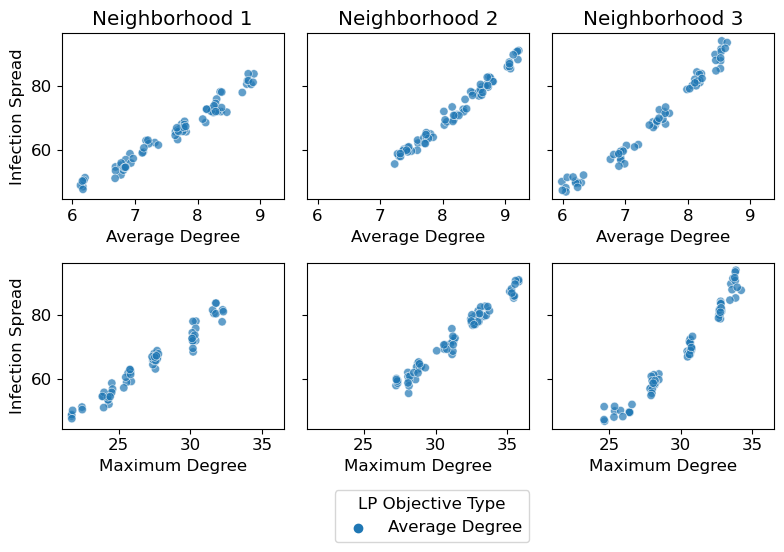

In [12]:
fig, axs = plt.subplots(ncols=3, nrows = 2, figsize=(8, 5), sharex='row', sharey='row')

for i, graph_seed in enumerate(graph_seeds):

    plot = sns.scatterplot(df_leak_infection_supplemented[df_leak_infection_supplemented['graph_seed'] == graph_seed],\
                           x="evaluated_avg_degree", y="evaluated_infection_spread", hue="lp_type", hue_order = ['greedy_max_degree'], ax=axs[0][i],\
                           legend=True, alpha=0.7)
    handles, labels = axs[0][i].get_legend_handles_labels()
    plot.legend().remove()
    axs[0][i].set_title(f"Neighborhood {graph_dict[graph_seed]}")
    axs[0][i].set_ylabel("")
    axs[0][i].set_xlabel("Average Degree")
    
    plot = sns.scatterplot(df_leak_infection_supplemented[df_leak_infection_supplemented['graph_seed'] == graph_seed],\
                           x="evaluated_max_degree", y="evaluated_infection_spread", hue="lp_type", hue_order = ['greedy_max_degree'], ax = axs[1][i],\
                           legend=False, alpha=0.7)
    axs[1][i].set_xlabel("Maximum Degree")
    axs[1][i].set_ylabel("")
    
    if i == 0:
        axs[0][i].set_ylabel("Infection Spread")
        axs[1][i].set_ylabel("Infection Spread")

plt.tight_layout()
fig.legend(handles, ['Average Degree', 'Maximum Degree'], loc='upper center', title="LP Objective Type", ncol = 4, bbox_to_anchor=(0.55, 0.02))
plt.savefig('figures/infection_greedy_max_avg_criteria.png', dpi=300, bbox_inches='tight')
#plt.figtext(1, -0.2, f"Vertices are selected from the Montgomery network using BFS on a randomly selected node to create a neighborhood of {vertex_count}.\
#Leak probability is adjusted with intervals of 0.025, ranging from 0.025 to 0.3 The network is trained and evaluated on a sample size of 250 for a total of 15 trials.", wrap=True, horizontalalignment='right', fontsize=8)

#### Robustness

In [25]:
# robust_dfs contains the runs where we do not know the actual leak
# leak_dfs contains the runs where we know the actual leak

leak_dfs = []
robust_dfs = []

for graph_seed in graph_seeds:
    leak_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_{graph_seed}.json'))
    
    # If files do not store the assumed leak, tag it on to the dataframe as a constant column
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_robustness_0.1_{graph_seed}.json'))
    robust_dfs[-1]['frozen_leak'] = 0.1
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_robustness_0.05_{graph_seed}.json'))
    robust_dfs[-1]['frozen_leak'] = 0.05
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_robustness_0.2_{graph_seed}.json'))
    robust_dfs[-1]['frozen_leak'] = 0.2

In [7]:
# robust_dfs contains the runs where we do not know the actual leak
# leak_dfs contains the runs where we know the actual leak

leak_dfs = []
robust_dfs = []

for graph_seed in graph_seeds:
    #leak_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_{graph_seed}_budget_50.json'))
    
    # If files do not store the assumed leak, tag it on to the dataframe as a constant column
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_0.1_{graph_seed}.json'))
    robust_dfs[-1]['frozen_leak'] = 0.1
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_0.05_{graph_seed}.json'))
    robust_dfs[-1]['frozen_leak'] = 0.05
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_0.2_{graph_seed}.json'))
    robust_dfs[-1]['frozen_leak'] = 0.2

In [3]:
# robust_dfs contains the runs where we do not know the actual leak
# leak_dfs contains the runs where we know the actual leak

leak_dfs = []
robust_dfs = []

for graph_seed in graph_seeds:
    #leak_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_{graph_seed}_budget_50.json'))
    
    # If files do not store the assumed leak, tag it on to the dataframe as a constant column
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.1_{graph_seed}_budget_50_infection_0.2.json'))
    robust_dfs[-1]['frozen_leak'] = 0.1
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.05_{graph_seed}_budget_50_infection_0.2.json'))
    robust_dfs[-1]['frozen_leak'] = 0.05
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.2_{graph_seed}_budget_50_infection_0.2.json'))
    robust_dfs[-1]['frozen_leak'] = 0.2

In [4]:
repeat_rounding = False

#df_leak = pd.concat(leak_dfs)
#df_leak = df_leak[(df_leak['lp_type']=='avg_degree') | ((df_leak['repeat_rounding'] == repeat_rounding) & (df_leak['lp_type']=='max_degree'))]

df_robust = pd.concat(robust_dfs)
#df_robust = df_robust[(df_robust['lp_type']=='avg_degree') | ((df_robust['repeat_rounding'] == repeat_rounding) & (df_robust['lp_type']=='max_degree'))]

Max/Avg Objective

ValueError: Could not interpret value `evaluated_max_degree` for parameter `y`

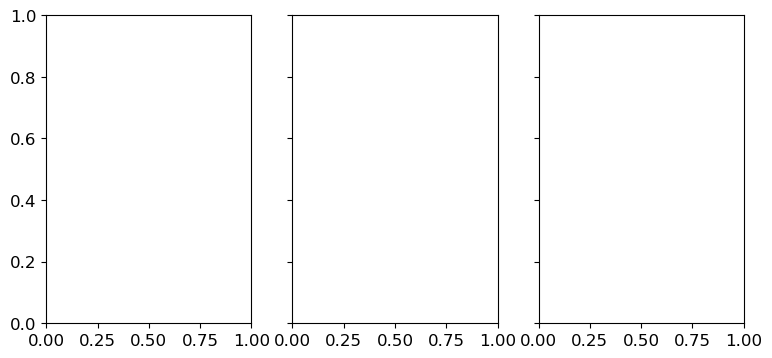

In [8]:
fig, axs = plt.subplots(ncols = 3, nrows=1, figsize=(9, 4), sharex=True, sharey='row')

plt.rcParams.update({'font.size': 12})
hue_order = ['avg_degree', 'max_degree']

graph_seeds = [42, 3345638259, 379427824]
graph_dict = {g:i+1 for i,g in enumerate(graph_seeds)}

for i, graph_seed in enumerate(graph_seeds):
    
    # avg with known leak
   
    
    # max with known leak
    plot1 = sns.lineplot(df_leak[(df_leak['graph_seed']==graph_seed)&((df_leak['lp_type']=='max_degree')|True)],\
                 x='transm_prob', y='evaluated_max_degree', label='Max (Known Leak)', hue_order = hue_order, color=sns.color_palette("magma")[0], ax = axs[i], legend = False)
    
    # max with leak assumed to be .2
    plot1 = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&((df_robust['lp_type']=='max_degree')|True)&(df_robust['frozen_leak']==0.2)], \
                 x='leak_probability', y='evaluated_max_degree', label='Max (Leak=0.2)', ax = axs[i], linestyle = 'dashed', color=sns.color_palette("magma")[2], legend = False)
    
    # max with leak assumed to be .1
    plot1 = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&((df_robust['lp_type']=='max_degree')|True)&(df_robust['frozen_leak']==0.1)], \
                 x='leak_probability', y='evaluated_max_degree', label='Max (Leak=0.1)', ax = axs[i], linestyle = 'dashed', color=sns.color_palette("magma")[4], legend = False)
    
    # max with leak assumed to be .05
    plot1 = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&((df_robust['lp_type']=='max_degree')|True)&(df_robust['frozen_leak']==0.05)], \
                 x='leak_probability', y='evaluated_max_degree', label='Max (Leak=0.05)', ax = axs[i], linestyle = 'dashed', color=sns.color_palette("magma")[5], legend = True)

    handles1, labels1 = axs[i].get_legend_handles_labels()
    plot1.legend().remove()
    
    axs[i].set_xlabel("Actual Leak Probability")
    axs[i].set_ylabel("")
    
    if i == 0:
        axs[i].set_ylabel("Maximum Degree")

fig.legend(handles1, labels1, loc='upper center', title="Algorithm (Information Level)", ncol = 4, bbox_to_anchor=(0.51, 0.04))

plt.tight_layout()
plt.savefig("figures/robust_leak_maxavg_comparison.png", dpi=300, bbox_inches='tight')

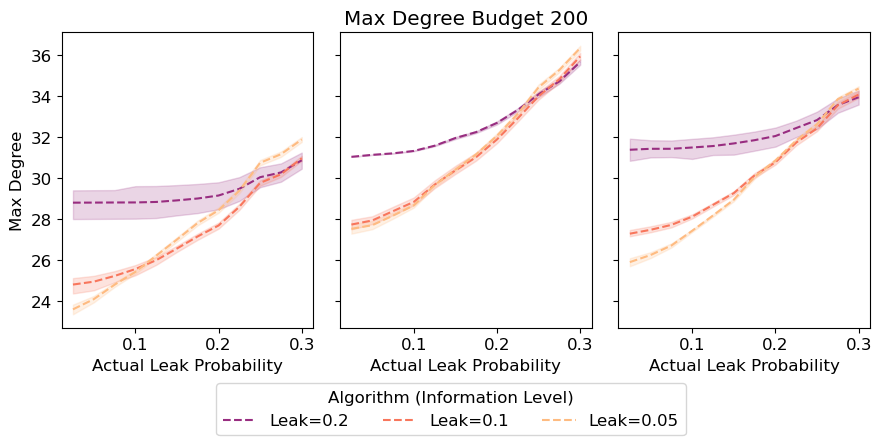

In [29]:
fig, axs = plt.subplots(ncols = 3, nrows=1, figsize=(9, 4), sharex=True, sharey='row')

plt.rcParams.update({'font.size': 12})
hue_order = ['avg_degree', 'max_degree']

graph_seeds = [42, 3345638259, 379427824]
graph_dict = {g:i+1 for i,g in enumerate(graph_seeds)}

for i, graph_seed in enumerate(graph_seeds):
       
    # max with known leak
    #plot1 = sns.lineplot(df_leak[(df_leak['graph_seed']==graph_seed)&((df_leak['lp_type']=='max_degree')|True)],\
                 #x='leak_probability', y='evaluated_spectral_rad', label='Max (Known Leak)', hue_order = hue_order, color=sns.color_palette("magma")[0], ax = axs[i], legend = False)
    
    # max with leak assumed to be .2
    plot1 = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&((df_robust['lp_type']=='max_degree')|True)&(df_robust['frozen_leak']==0.2)], \
                 x='leak_probability', y='evaluated_max_degree', label='Leak=0.2', ax = axs[i], linestyle = 'dashed', color=sns.color_palette("magma")[2], legend = False)
    
    # max with leak assumed to be .1
    plot1 = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&((df_robust['lp_type']=='max_degree')|True)&(df_robust['frozen_leak']==0.1)], \
                 x='leak_probability', y='evaluated_max_degree', label='Leak=0.1', ax = axs[i], linestyle = 'dashed', color=sns.color_palette("magma")[4], legend = False)
    
    # max with leak assumed to be .05
    plot1 = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&((df_robust['lp_type']=='max_degree')|True)&(df_robust['frozen_leak']==0.05)], \
                 x='leak_probability', y='evaluated_max_degree', label='Leak=0.05', ax = axs[i], linestyle = 'dashed', color=sns.color_palette("magma")[5], legend = True)

    handles1, labels1 = axs[i].get_legend_handles_labels()
    plot1.legend().remove()
    
    axs[i].set_xlabel("Actual Leak Probability")
    axs[i].set_ylabel("")
    
    if i == 0:
        axs[i].set_ylabel("Max Degree")

fig.legend(handles1, labels1, loc='upper center', title="Algorithm (Information Level)", ncol = 4, bbox_to_anchor=(0.51, 0.04))
axs[1].set_title('Max Degree Budget 200')

plt.tight_layout()
plt.savefig("figures/robust_leak_greedy_comparison_budget_200.png", dpi=300, bbox_inches='tight')

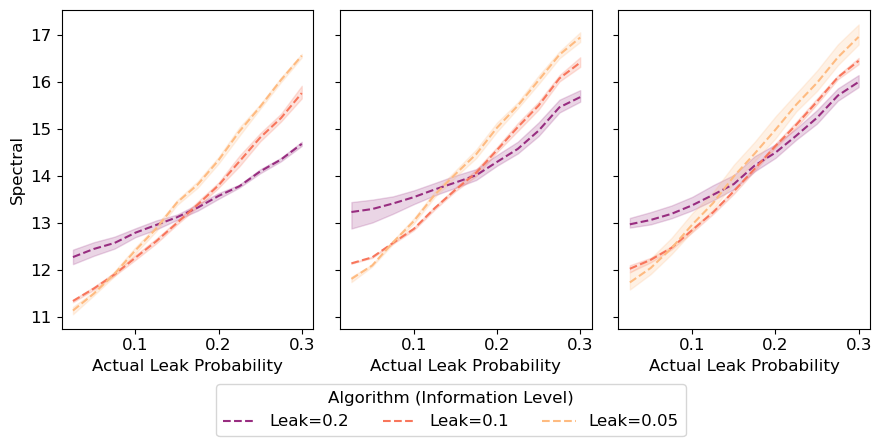

In [9]:
fig, axs = plt.subplots(ncols = 3, nrows=1, figsize=(9, 4), sharex=True, sharey='row')

plt.rcParams.update({'font.size': 12})
hue_order = ['avg_degree', 'max_degree']

graph_seeds = [42, 3345638259, 379427824]
graph_dict = {g:i+1 for i,g in enumerate(graph_seeds)}

for i, graph_seed in enumerate(graph_seeds):
       
    # max with known leak
    #plot1 = sns.lineplot(df_leak[(df_leak['graph_seed']==graph_seed)&((df_leak['lp_type']=='max_degree')|True)],\
                 #x='leak_probability', y='evaluated_spectral_rad', label='Max (Known Leak)', hue_order = hue_order, color=sns.color_palette("magma")[0], ax = axs[i], legend = False)
    
    # max with leak assumed to be .2
    plot1 = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&((df_robust['lp_type']=='max_degree')|True)&(df_robust['frozen_leak']==0.2)], \
                 x='leak_probability', y='evaluated_spectral_rad', label='Leak=0.2', ax = axs[i], linestyle = 'dashed', color=sns.color_palette("magma")[2], legend = False)
    
    # max with leak assumed to be .1
    plot1 = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&((df_robust['lp_type']=='max_degree')|True)&(df_robust['frozen_leak']==0.1)], \
                 x='leak_probability', y='evaluated_spectral_rad', label='Leak=0.1', ax = axs[i], linestyle = 'dashed', color=sns.color_palette("magma")[4], legend = False)
    
    # max with leak assumed to be .05
    plot1 = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&((df_robust['lp_type']=='max_degree')|True)&(df_robust['frozen_leak']==0.05)], \
                 x='leak_probability', y='evaluated_spectral_rad', label='Leak=0.05', ax = axs[i], linestyle = 'dashed', color=sns.color_palette("magma")[5], legend = True)

    handles1, labels1 = axs[i].get_legend_handles_labels()
    plot1.legend().remove()
    
    axs[i].set_xlabel("Actual Leak Probability")
    axs[i].set_ylabel("")
    
    if i == 0:
        axs[i].set_ylabel("Spectral")

fig.legend(handles1, labels1, loc='upper center', title="Algorithm (Information Level)", ncol = 4, bbox_to_anchor=(0.51, 0.04))

plt.tight_layout()
plt.savefig("figures/robust_leak_spectral_comparison_budget_200.png", dpi=300, bbox_inches='tight')

Infection Spread

In [3]:
# Infection spread is evaluated separately

leak_dfs = []
robust_dfs = []
realbase_dfs =[]
for graph_seed in graph_seeds:
    leak_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_infection_{graph_seed}.json'))
    
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_robustness_infection_0.1_{graph_seed}.json'))
    robust_dfs[-1]['frozen_leak'] = 0.1
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_robustness_infection_0.05_{graph_seed}.json'))
    robust_dfs[-1]['frozen_leak'] = 0.05
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_leak_robustness_infection_0.2_{graph_seed}.json'))
    robust_dfs[-1]['frozen_leak'] = 0.2
    realbase_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_realbaseline_robustness_infection_{graph_seed}.json'))

In [4]:
# Infection spread is evaluated separately

leak_dfs = []
robust_dfs = []
realbase_dfs =[]
for graph_seed in graph_seeds:
    leak_dfs.append(pd.read_json(f'evaluation/evaluated_noVac_leak_robustness_{graph_seed}.json'))

In [5]:
# Infection spread is evaluated separately

leak_dfs = []
robust_dfs = []
realbase_dfs =[]
for graph_seed in graph_seeds:
    #leak_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_infection_{graph_seed}.json'))
    
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.1_{graph_seed}_budget_50_infection_0.2.json'))
    robust_dfs[-1]['frozen_leak'] = 0.1
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.05_{graph_seed}_budget_50_infection_0.2.json'))
    robust_dfs[-1]['frozen_leak'] = 0.05
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.2_{graph_seed}_budget_50_infection_0.2.json'))
    robust_dfs[-1]['frozen_leak'] = 0.2

In [3]:
# Infection spread is evaluated separately

leak_dfs = []
robust_dfs = []
realbase_dfs =[]
for graph_seed in graph_seeds:
    #leak_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_infection_{graph_seed}.json'))
    
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.1_{graph_seed}_budget_50_infection_0.2.json'))
    robust_dfs[-1]['frozen_leak'] = 0.1
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.05_{graph_seed}_budget_50_infection_0.2.json'))
    robust_dfs[-1]['frozen_leak'] = 0.05
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.2_{graph_seed}_budget_50_infection_0.2.json'))
    robust_dfs[-1]['frozen_leak'] = 0.2

In [3]:
# Infection spread is evaluated separately

leak_dfs = []
robust_dfs = []
realbase_dfs =[]
for graph_seed in graph_seeds:
    #leak_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_infection_{graph_seed}.json'))
    
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.1_{graph_seed}_transm_prob_leak_0.3.json'))
    robust_dfs[-1]['frozen_leak'] = 0.1
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.05_{graph_seed}_transm_prob_leak_0.3.json'))
    robust_dfs[-1]['frozen_leak'] = 0.05
    robust_dfs.append(pd.read_json(f'evaluation/evaluated_spectral_leak_robustness_infection_0.2_{graph_seed}_transm_prob_leak_0.3.json'))
    robust_dfs[-1]['frozen_leak'] = 0.2

In [4]:
repeat_rounding = False

#df_leak = pd.concat(leak_dfs)
df_robust = pd.concat(robust_dfs)
#df_realbase = pd.concat(realbase_dfs)

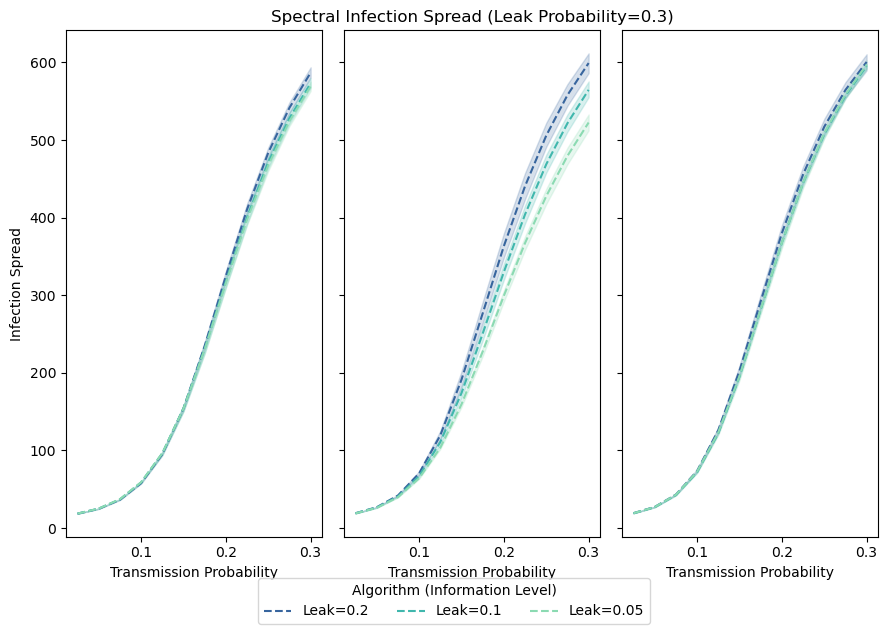

In [5]:
fig, axs = plt.subplots(ncols = 3, nrows=1, figsize=(9, 6), sharex=False, sharey=True)

graph_seeds = [42, 3345638259, 379427824]
graph_dict = {g:i+1 for i,g in enumerate(graph_seeds)}
hue_order = ['avg_degree', 'max_degree']
for i, graph_seed in enumerate(graph_seeds):
    
    #plot = sns.lineplot(df_leak[(df_leak['graph_seed']==graph_seed)],\
                 #x='leak_probability', y='evaluated_infection_spread', label='Avg (Known Leak)', color=(sns.color_palette()[0]), hue_order = hue_order, legend=True, ax = axs[i])
    #plot = sns.lineplot(df_realbase[(df_realbase['graph_seed']==graph_seed)],\
                 #x='leak_probability', y='evaluated_infection_spread', label='Avg (0 Leak)', color=(sns.color_palette()[3]), legend=True, ax = axs[0][i])
    
    plot = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&(df_robust['frozen_leak']==0.2)], \
                 x='transmission_probability', y='evaluated_infection_spread', label='Leak=0.2', color=sns.color_palette("mako")[2], linestyle = 'dashed', ax = axs[i], legend = True)
    
    plot = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&(df_robust['frozen_leak']==0.1)], \
                 x='transmission_probability', y='evaluated_infection_spread', label='Leak=0.1', color=sns.color_palette("mako")[4], linestyle = 'dashed', ax = axs[i], legend = True)
    
    plot = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&(df_robust['frozen_leak']==0.05)], \
                 x='transmission_probability', y='evaluated_infection_spread', label='Leak=0.05', color=sns.color_palette("mako")[5], linestyle = 'dashed', ax = axs[i], legend = True)
    
    handles, labels = axs[i].get_legend_handles_labels()
    #axs[i].set_title(f"Neighborhood {graph_dict[graph_seed]}")
    axs[i].set_ylabel("")
    plot.legend().remove()
    
    
    
    axs[i].set_xlabel("Transmission Probability")
    axs[i].set_ylabel("")
    
    if i == 0:
        axs[i].set_ylabel("Infection Spread")

axs[1].set_title('Spectral Infection Spread (Leak Probability=0.3)')
fig.legend(handles, labels, loc='upper center', title="Algorithm (Information Level)", ncol = 4, bbox_to_anchor=(0.51, 0.04))

plt.tight_layout()
plt.savefig("figures/robust_spectral_infection_comparison_greedy_budget_200_infection_infect_prob.png", dpi=300, bbox_inches='tight')

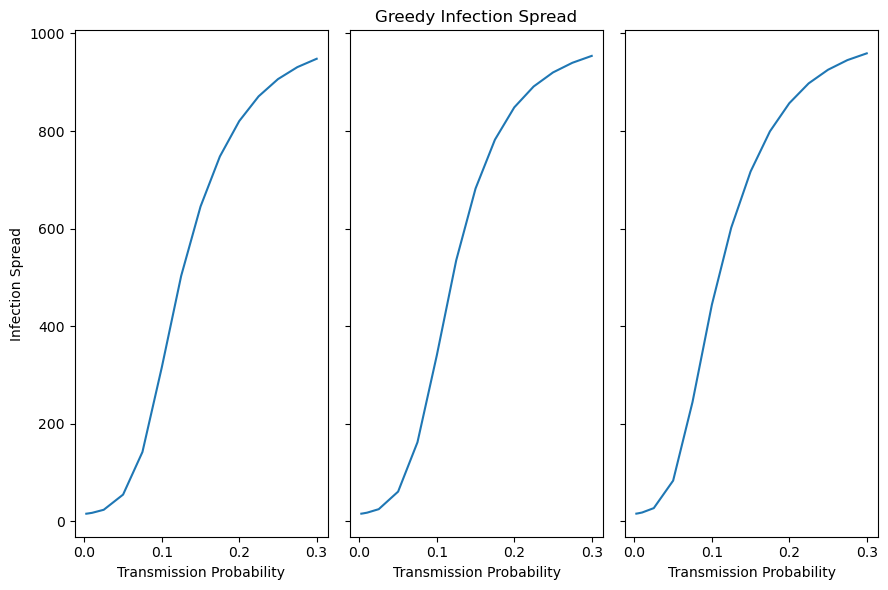

In [6]:
fig, axs = plt.subplots(ncols = 3, nrows=1, figsize=(9, 6), sharex=False, sharey=True)

graph_seeds = [42, 3345638259, 379427824]
graph_dict = {g:i+1 for i,g in enumerate(graph_seeds)}
hue_order = ['avg_degree', 'max_degree']
for i, graph_seed in enumerate(graph_seeds):
    
    plot = sns.lineplot(df_leak[(df_leak['graph_seed']==graph_seed)],\
                 x='transmission_probability', y='evaluated_infection_spread', label='Avg (Known Leak)', color=(sns.color_palette()[0]), hue_order = hue_order, legend=True, ax = axs[i])
    #plot = sns.lineplot(df_realbase[(df_realbase['graph_seed']==graph_seed)],\
                 #x='leak_probability', y='evaluated_infection_spread', label='Avg (0 Leak)', color=(sns.color_palette()[3]), legend=True, ax = axs[0][i])
    
    #plot = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&(df_robust['frozen_leak']==0.2)], \
                 #x='leak_probability', y='evaluated_infection_spread', label='Leak=0.2', color=sns.color_palette("mako")[2], linestyle = 'dashed', ax = axs[i], legend = True)
    
    #plot = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&(df_robust['frozen_leak']==0.1)], \
                 #x='leak_probability', y='evaluated_infection_spread', label='Leak=0.1', color=sns.color_palette("mako")[4], linestyle = 'dashed', ax = axs[i], legend = True)
    
    #plot = sns.lineplot(df_robust[(df_robust['graph_seed']==graph_seed)&(df_robust['frozen_leak']==0.05)], \
                 #x='leak_probability', y='evaluated_infection_spread', label='Leak=0.05', color=sns.color_palette("mako")[5], linestyle = 'dashed', ax = axs[i], legend = True)
    
    handles, labels = axs[i].get_legend_handles_labels()
    #axs[i].set_title(f"Neighborhood {graph_dict[graph_seed]}")
    axs[i].set_ylabel("")
    plot.legend().remove()
    
    
    
    axs[i].set_xlabel("Transmission Probability")
    axs[i].set_ylabel("")
    
    if i == 0:
        axs[i].set_ylabel("Infection Spread")

axs[1].set_title('Greedy Infection Spread')


plt.tight_layout()
plt.savefig("figures/infection_transmission.png", dpi=300, bbox_inches='tight')

#### Appendix Experiments

In [57]:
dfs = []
infection_dfs = []

# Load leak and infection for leak runs
for graph_seed in graph_seeds:
    file_path = f'evaluation/evaluated_leak_{graph_seed}.json'
    dfs.append(pd.read_json(file_path))
    infection_dfs.append(pd.read_json(f'evaluation/evaluated_leak_infection_{graph_seed}.json'))

df_leak_main = pd.concat(dfs)
df_leak_main['exp_budget'] = df_leak_main['vaccinated_vertices'].apply(lambda x: len(x))

df_leak_infection = pd.concat(infection_dfs)
df_leak_infection = df_leak_infection[df_leak_infection['transmission_probability']==0.1]

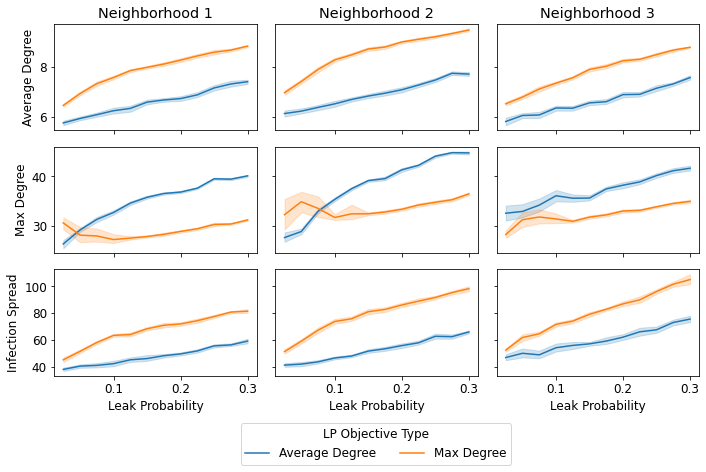

In [58]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 6), sharex=True, sharey='row')

hue_order = ['avg_degree', 'max_degree']

for i, graph_seed in enumerate(graph_seeds):

    plot = sns.lineplot(df_leak_main[df_leak_main['graph_seed'] == graph_seed], x="leak_probability", y="evaluated_avg_degree", hue="lp_type", ax=axs[0][i], hue_order = hue_order,legend=True)
    handles, labels = axs[0][i].get_legend_handles_labels()
    plot.legend().remove()
    axs[0][i].set_title(f"Neighborhood {graph_dict[graph_seed]}")
    axs[0][i].set_ylabel("")

    sns.lineplot(df_leak_main[df_leak_main['graph_seed'] == graph_seed], x="leak_probability", y="evaluated_max_degree", hue="lp_type", ax=axs[1][i], hue_order = hue_order, legend=False)
    axs[1][i].set_xlabel("")
    axs[1][i].set_ylabel("")
    
    sns.lineplot(df_leak_infection[df_leak_infection['graph_seed'] == graph_seed], x="leak_probability", y="evaluated_infection_spread", hue="lp_type", ax=axs[2][i], hue_order = hue_order, legend=False)
    axs[2][i].set_xlabel("Leak Probability")
    axs[2][i].set_ylabel("")
    
    if i == 0:
        axs[0][i].set_ylabel("Average Degree")
        axs[1][i].set_ylabel("Max Degree")
        axs[2][i].set_ylabel("Infection Spread")

plt.tight_layout()
fig.legend(handles, ['Average Degree', 'Max Degree'], loc='upper center', title="LP Objective Type", ncol = 2, bbox_to_anchor=(0.53, 0.02))

plt.savefig("figures/avg_max_comparison.png", dpi=300, bbox_inches='tight')

### Infection Metric of Baseline v. Leaky Algorithms

In [11]:
# infection spread is separately evaluated

baseline_dfs = []
leak_dfs = []
for graph_seed in graph_seeds:
    baseline_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_baseline_infection_{graph_seed}.json'))
    leak_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_baseline_leak_infection_{graph_seed}.json'))

FileNotFoundError: File evaluation/evaluated_greedy_baseline_infection_42.json does not exist

In [81]:
repeat_rounding = False

df_baseline = pd.concat(baseline_dfs)
df_baseline = df_baseline[(df_baseline['lp_type']=='avg_degree') | ((df_baseline['repeat_rounding'] == repeat_rounding) & (df_baseline['lp_type']=='max_degree'))]

df_leak = pd.concat(leak_dfs)
df_leak = df_leak[(df_leak['lp_type']=='avg_degree') | ((df_leak['repeat_rounding'] == repeat_rounding) & (df_leak['lp_type']=='max_degree'))]

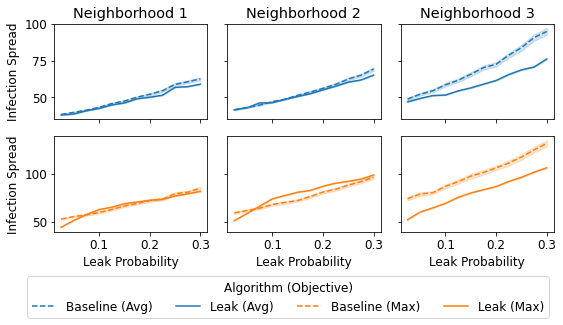

In [82]:
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(8, 4), sharex=True, sharey='row')

hue_order = ['avg_degree', 'max_degree']
graph_seeds = [42, 3345638259, 379427824]
graph_dict = {g:i+1 for i,g in enumerate(graph_seeds)}

for i, graph_seed in enumerate(graph_seeds):
    
    # plot avg and baseline
    plot = sns.lineplot(df_baseline[(df_baseline['graph_seed']==graph_seed)&(df_baseline['budget']==200)&(df_baseline['lp_type']=='avg_degree')],\
                 x='leak_probability', y='evaluated_infection_spread', label='Baseline (Avg)', color=sns.color_palette()[0], linestyle = 'dashed', legend=True, ax = axs[0][i])

    # plot max and baseline
    plot1 = sns.lineplot(df_baseline[(df_baseline['graph_seed']==graph_seed)&(df_baseline['budget']==200)&(df_baseline['lp_type']=='max_degree')],\
             x='leak_probability', y='evaluated_infection_spread', label='Baseline (Max)', color=sns.color_palette()[1], linestyle = 'dashed', legend=True, ax = axs[1][i])

    # plot avg and leaky
    plot = sns.lineplot(df_leak[(df_leak['graph_seed']==graph_seed)&(df_leak['budget']==200)&(df_leak['lp_type']=='avg_degree')],\
             x='leak_probability', y='evaluated_infection_spread', label='Leak (Avg)', color=sns.color_palette()[0], ax = axs[0][i], legend = True)

    # plot max and leaky
    plot1 = sns.lineplot(df_leak[(df_leak['graph_seed']==graph_seed)&(df_leak['budget']==200)&(df_leak['lp_type']=='max_degree')],\
             x='leak_probability', y='evaluated_infection_spread', label='Leak (Max)', color=sns.color_palette()[1], ax = axs[1][i], legend = True)

    handles, labels = axs[0][i].get_legend_handles_labels()
    handles2, labels2 = axs[1][i].get_legend_handles_labels()
    
    axs[0][i].set_title(f"Neighborhood {graph_dict[graph_seed]}")
    axs[0][i].set_ylabel("")
    plot.legend().remove()
    plot1.legend().remove()
    
    
    axs[1][i].set_xlabel("Leak Probability")
    axs[1][i].set_ylabel("")
    
    if i == 0:
        axs[0][i].set_ylabel("Infection Spread")
        axs[1][i].set_ylabel("Infection Spread")

fig.legend(handles+handles2, labels+labels2, loc='upper center', title="Algorithm (Objective)", ncol = 4, bbox_to_anchor=(0.51, 0.04))

plt.tight_layout()
plt.savefig("figures/baseline_leak_infection_comparison.png", dpi=300, bbox_inches='tight')

Budget Sensitivity

In [8]:
baseline_dfs = []
budget_dfs = []

baseline_infection_dfs = []
# Load baseline and budget runs (w/ separate infection stats)
for graph_seed in graph_seeds:
    baseline_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_baseline_{graph_seed}_fix.json'))
    budget_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_baseline_budget_{graph_seed}.json'))
    
    #baseline_infection_dfs.append(pd.read_json(f'evaluation/evaluated_greedy_baseline_infection_{graph_seed}.json'))

df_baseline = pd.concat(baseline_dfs)
df_budget = pd.concat(budget_dfs)
df_budget['exp_budget'] = df_budget['vaccinated_vertices'].apply(lambda x: len(x))

df_infection_baseline = pd.concat(baseline_infection_dfs)
df_infection_baseline = df_infection_baseline[df_infection_baseline['transmission_probability']==0.1]

ValueError: No objects to concatenate

Baseline Comparison

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows=2, figsize=(8, 4), sharex=True, sharey='row')

plt.rcParams.update({'font.size': 12})
hue_order = ['avg_degree', 'max_degree']
graph_seeds = [42, 3345638259, 379427824]
graph_dict = {g:i+1 for i,g in enumerate(graph_seeds)}

for i, graph_seed in enumerate(graph_seeds):
    
    plot = sns.lineplot(df_baseline[(df_baseline['graph_seed']==graph_seed)&(df_baseline['lp_type']=='avg_degree')&\
                                    (df_baseline['leak_probability']==0.2)],\
                 x='budget', y='evaluated_avg_degree', label='Baseline (Avg)', linestyle='dashed', color=sns.color_palette()[0], hue_order = hue_order, legend=True, ax = axs[0][i])
    
    plot = sns.lineplot(df_budget[(df_budget['graph_seed']==graph_seed)&(df_budget['lp_type']=='avg_degree')], \
                 x='budget', y='evaluated_avg_degree', label='Leaky (Avg)', ax = axs[0][i], color=sns.color_palette()[0], hue_order = hue_order, legend = True)

    handles, labels = axs[0][i].get_legend_handles_labels()
    axs[0][i].set_title(f"Neighborhood {graph_dict[graph_seed]}")
    axs[0][i].set_ylabel("")
    plot.legend().remove()
    
    
    plot1 = sns.lineplot(df_baseline[(df_baseline['graph_seed']==graph_seed)&(df_baseline['lp_type']=='max_degree')&\
                            (df_baseline['leak_probability']==0.2)],\
                 x='budget', y='evaluated_max_degree', label='Baseline (Max)', linestyle='dashed', color=sns.color_palette()[1], hue_order = hue_order, ax = axs[1][i], legend = True)
    plot1 = sns.lineplot(df_budget[(df_budget['graph_seed']==graph_seed)&(df_budget['lp_type']=='max_degree')],\
                 x='budget', y='evaluated_max_degree', label='Leaky (Max)', color=sns.color_palette()[1], hue_order = hue_order, ax=axs[1][i], legend=True)

    handles1, labels1 = axs[1][i].get_legend_handles_labels()
    axs[1][i].set_xlabel("Budget")
    axs[1][i].set_ylabel("")
    plot1.legend().remove()
    
    if i == 0:
        axs[0][i].set_ylabel("Average Degree")
        axs[1][i].set_ylabel("Max Degree")

fig.legend(handles+handles1, labels+labels1, loc='upper center', title="Algorithm (Objective)", ncol = 4, bbox_to_anchor=(0.53, 0.05))

plt.tight_layout()
plt.savefig("figures/baseline_maxavg_budget_comparison.png", dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


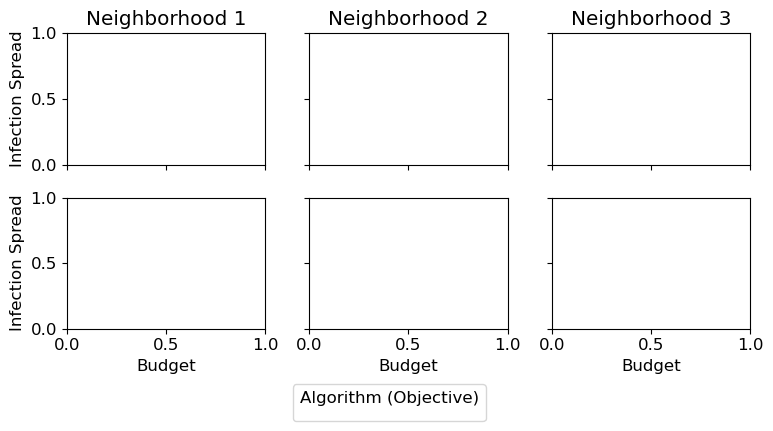

In [7]:
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(8, 4), sharex=True, sharey='row')

hue_order = ['avg_degree', 'max_degree']
graph_seeds = [42, 3345638259, 379427824]
graph_dict = {g:i+1 for i,g in enumerate(graph_seeds)}

for i, graph_seed in enumerate(graph_seeds):
    
    #plot = sns.lineplot(df_infection_baseline[(df_infection_baseline['graph_seed']==graph_seed)&(df_infection_baseline['lp_type']=='avg_degree')],\
                 #x='budget', y='evaluated_infection_spread', label='Baseline (Avg)', color=sns.color_palette()[0], linestyle = 'dashed', legend=True, ax = axs[0][i])

    #plot1 = sns.lineplot(df_infection_baseline[(df_infection_baseline['graph_seed']==graph_seed)&(df_infection_baseline['lp_type']=='max_degree')],\
             #x='budget', y='evaluated_infection_spread', label='Baseline (Max)', color=sns.color_palette()[1], linestyle = 'dashed', legend=True, ax = axs[1][i])

    plot = sns.lineplot(df_budget[(df_budget['graph_seed']==graph_seed)&(df_budget['lp_type']=='avg_degree')],\
             x='budget', y='evaluated_infection_spread', label='Leak (Avg)', color=sns.color_palette()[0], ax = axs[0][i], legend = True)

    plot1 = sns.lineplot(df_budget[(df_budget['graph_seed']==graph_seed)&(df_budget['lp_type']=='max_degree')],\
             x='budget', y='evaluated_infection_spread', label='Leak (Max)', color=sns.color_palette()[1], ax = axs[1][i], legend = True)

    handles, labels = axs[0][i].get_legend_handles_labels()
    handles2, labels2 = axs[1][i].get_legend_handles_labels()
    
    axs[0][i].set_title(f"Neighborhood {graph_dict[graph_seed]}")
    axs[0][i].set_ylabel("")
    plot.legend().remove()
    plot1.legend().remove()
    
    
    axs[1][i].set_xlabel("Budget")
    axs[1][i].set_ylabel("")
    
    if i == 0:
        axs[0][i].set_ylabel("Infection Spread")
        axs[1][i].set_ylabel("Infection Spread")

fig.legend(handles+handles2, labels+labels2, loc='upper center', title="Algorithm (Objective)", ncol = 4, bbox_to_anchor=(0.51, 0.04))

plt.tight_layout()
plt.savefig("figures/baseline_budget_infection_comparison.png", dpi=300, bbox_inches='tight')

Cross-Comparison of Max and Avg Degree LPs

In [64]:
budget_dfs = []
budget_infection_dfs = []
# Load budget runs (w/ separate infection stats)
for graph_seed in graph_seeds:
    budget_dfs.append(pd.read_json(f'evaluation/evaluated_budget_{graph_seed}.json'))
    budget_infection_dfs.append(pd.read_json(f'evaluation/evaluated_budget_infection_{graph_seed}.json'))

df_budget_main = pd.concat(budget_dfs)
df_budget_main['exp_budget'] = df_budget_main['vaccinated_vertices'].apply(lambda x: len(x))

df_infection_budget = pd.concat(budget_infection_dfs)
df_infection_budget = df_infection_budget[df_infection_budget['transmission_probability']==0.1]

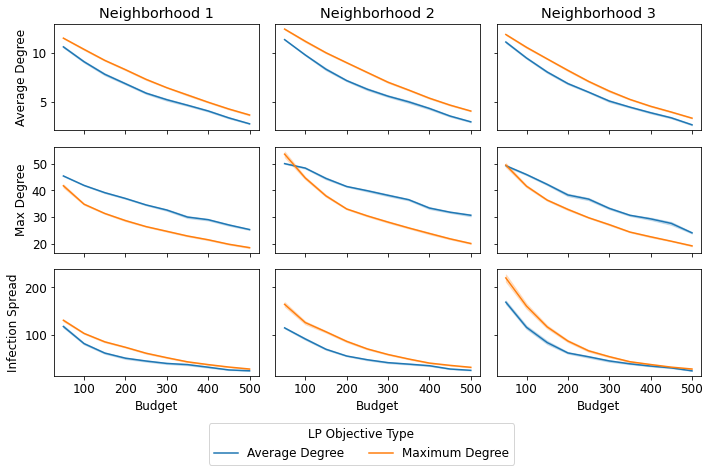

In [65]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 6), sharex=True, sharey='row')

hue_order = ['avg_degree', 'max_degree']

for i, graph_seed in enumerate(graph_seeds):
    
    plot = sns.lineplot(df_budget_main[df_budget_main['graph_seed'] == graph_seed],\
                        x="budget", y="evaluated_avg_degree", hue="lp_type", ax=axs[0][i], hue_order=hue_order, legend=True)
    handles, labels = axs[0][i].get_legend_handles_labels()
    plot.legend().remove()
    axs[0][i].set_title(f"Neighborhood {graph_dict[graph_seed]}")
    axs[0][i].set_ylabel("")

    sns.lineplot(df_budget_main[df_budget_main['graph_seed'] == graph_seed],\
                 x="budget", y="evaluated_max_degree", hue="lp_type", ax=axs[1][i], hue_order=hue_order, legend=False)
    axs[1][i].set_xlabel("")
    axs[1][i].set_ylabel("")
    
    sns.lineplot(df_infection_budget[df_infection_budget['graph_seed'] == graph_seed],\
                 x="budget", y="evaluated_infection_spread", hue="lp_type", ax=axs[2][i], hue_order = hue_order, legend=False)
    axs[2][i].set_xlabel("Budget")
    axs[2][i].set_ylabel("")
    
    if i == 0:
        axs[0][i].set_ylabel("Average Degree")
        axs[1][i].set_ylabel("Max Degree")
        axs[2][i].set_ylabel("Infection Spread")

plt.tight_layout()
fig.legend(handles, ['Average Degree', 'Maximum Degree'], loc='upper center', title="LP Objective Type", ncol = 2, bbox_to_anchor=(0.51, 0.02))

plt.savefig("figures/avg_max_budget_comparison.png", dpi=300, bbox_inches='tight')

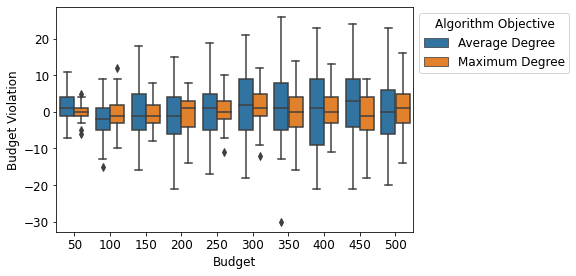

In [66]:
fig, ax = plt.subplots()

df_budget_main['exp_budget'] = df_budget_main['vaccinated_vertices'].apply(lambda x: len(x))
df_budget_main['budget_diff'] = df_budget_main['exp_budget'] - df_budget_main['budget']

plot = sns.boxplot(df_budget_main, x="budget", y="budget_diff", hue="lp_type", hue_order=['avg_degree', 'max_degree'])

plt.ylabel("Budget Violation")
plt.xlabel("Budget")

plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Average Degree', 'Maximum Degree'], title = 'Algorithm Objective', bbox_to_anchor=(1, 1))

plt.savefig("figures/avg_max_budget_budget_comparison.png", dpi=300, bbox_inches='tight')

Max Rounding Experiments

In [68]:
dfs = []
dfs_max_leak = []
graph_seeds = [42, 3345638259, 379427824]

for graph_seed in graph_seeds:
    dfs.append(pd.read_json(f'evaluation/evaluated_max_budget_{graph_seed}.json'))
    dfs_max_leak.append(pd.read_json(f'evaluation/evaluated_max_leak_{graph_seed}.json'))
    dfs_max_leak.append(pd.read_json(f'evaluation/evaluated_leak_{graph_seed}.json'))

max_round_df = pd.concat(dfs)
max_round_leak_df = pd.concat(dfs_max_leak)

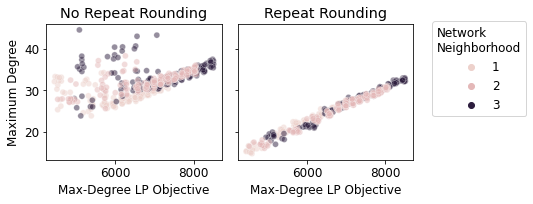

In [69]:
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(ncols=2, figsize=(6, 3), sharex=True, sharey='row')

hue_order = graph_seeds
sns.scatterplot(max_round_leak_df[(max_round_leak_df['lp_type']=='max_degree') & (max_round_leak_df['repeat_rounding']==False)], x="lp_objective", y="evaluated_max_degree", hue="graph_seed", hue_order = hue_order, ax=axs[0], alpha=0.5,  legend=False)
plot = sns.scatterplot(max_round_leak_df[(max_round_leak_df['lp_type']=='max_degree') & (max_round_leak_df['repeat_rounding']==True)], x="lp_objective", y="evaluated_max_degree", hue="graph_seed", hue_order = hue_order, ax=axs[1], alpha=0.5, legend=True)

handles, labels = axs[1].get_legend_handles_labels()
plot.legend().remove()

axs[0].set_ylabel("Maximum Degree")
axs[0].set_title("No Repeat Rounding")
axs[1].set_title("Repeat Rounding")
axs[0].set_xlabel("Max-Degree LP Objective")
axs[1].set_xlabel("Max-Degree LP Objective")

fig.legend(handles, [1, 2, 3], loc='upper left', title="Network\nNeighborhood", ncol = 1, bbox_to_anchor=(1, 0.9))

plt.tight_layout()

plt.savefig("figures/max_round_lp_comparison.png", dpi=300, bbox_inches='tight')

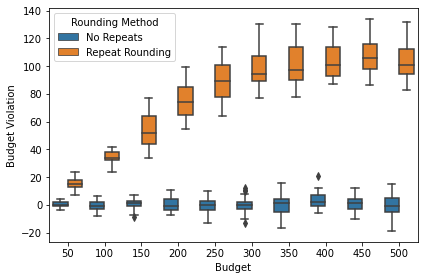

In [70]:
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots()

max_round_df['exp_budget'] = max_round_df['vaccinated_vertices'].apply(lambda x: len(x))
max_round_df['budget_diff'] = max_round_df['exp_budget'] - max_round_df['budget']

plot = sns.boxplot(max_round_df, x="budget", y="budget_diff", hue="repeat_rounding", hue_order=[False, True])

handles, labels = ax.get_legend_handles_labels()
plot.legend(handles, ['No Repeats', 'Repeat Rounding'], title="Rounding Method")

plt.ylabel("Budget Violation")
plt.xlabel("Budget")

plt.tight_layout()

plt.savefig("figures/max_round_budget_comparison.png", dpi=300, bbox_inches='tight')